In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
churn_df=pd.read_csv("customer_churn.csv")

In [3]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#droping customer id
churn_df.drop("customerID",axis=1,inplace=True)

In [5]:
churn_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Converting TotalCharges from object to int

In [6]:
type(churn_df.TotalCharges[0])

str

In [7]:
pd.to_numeric(churn_df.TotalCharges,errors="coerce").isnull().sum()

11

In [8]:
#removing empty strings from TotalCharges
churn_df=churn_df[churn_df["TotalCharges"]!=" "]

In [9]:
churn_df.TotalCharges=pd.to_numeric(churn_df.TotalCharges)

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
churn_df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [11]:
#getting unique values of categorical features
def get_unique_cat_feat_values(df):
    for column in df:
        if df[column].dtypes=="object":
            print(f"{column} : {df[column].unique()}")
            

In [12]:
get_unique_cat_feat_values(churn_df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [13]:
# Label Encoding

In [14]:
#churn_df["gender"].replace({"Male":0,"Female":1},inplace=True)

In [15]:
churn_df["OnlineSecurity"].replace({"No internet service":"No"},inplace=True)

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [16]:
churn_df["OnlineBackup"].replace({"No internet service":"No"},inplace=True)
churn_df["DeviceProtection"].replace({"No internet service":"No"},inplace=True)
churn_df["TechSupport"].replace({"No internet service":"No"},inplace=True)
churn_df["StreamingTV"].replace({"No internet service":"No"},inplace=True)
churn_df["StreamingMovies"].replace({"No internet service":"No"},inplace=True)

In [17]:
churn_df["MultipleLines"].replace("No phone service","No",inplace=True)

In [18]:
get_unique_cat_feat_values(churn_df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
get_unique_cat_feat_values(churn_df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# OR

In [20]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    churn_df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [21]:
churn_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Churn'>

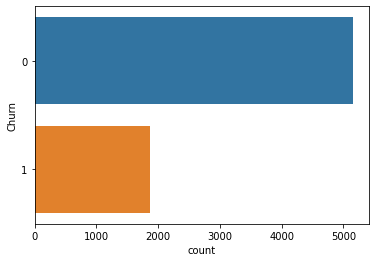

In [22]:
sns.countplot(y="Churn", data=churn_df)

In [23]:
df=churn_df

In [24]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [25]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

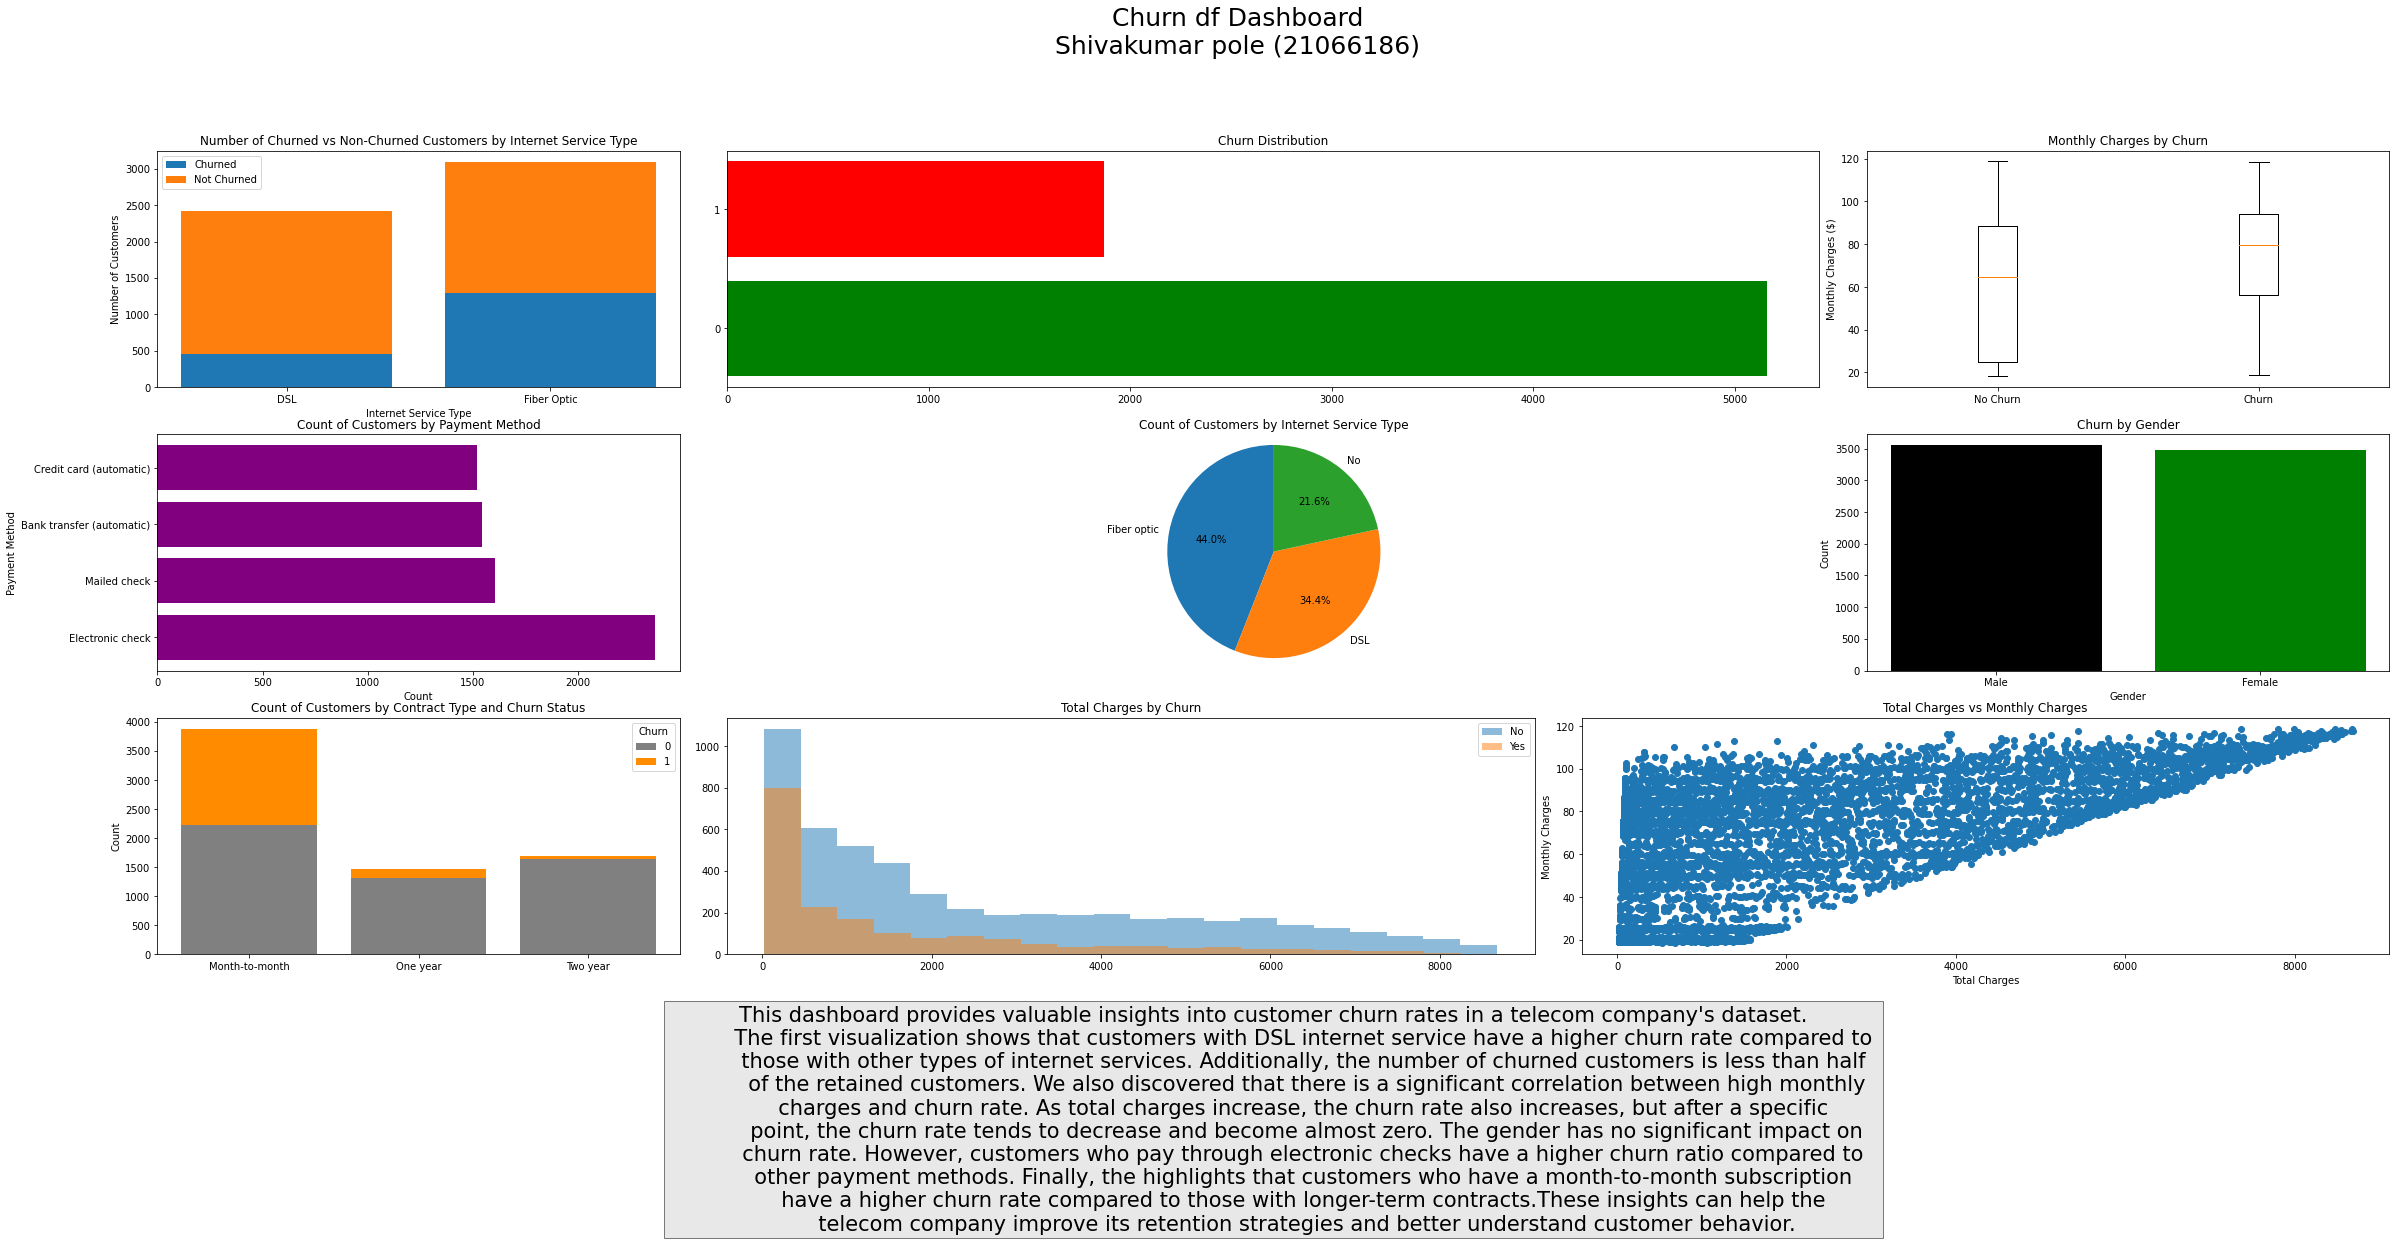

In [118]:
fig=plt.figure(figsize=(40,20))

# Create a grid of subplots with custom widths and heights
gs = gridspec.GridSpec(4, 8,figure=fig)

# Adding text
fig.suptitle(f'Churn df Dashboard\nShivakumar pole (21066186)', fontsize=25)

#Number of Churned vs Non-Churned Customers by Internet Service Type
# Create the subplots
ax1 = fig.add_subplot(gs[0, 0:2])
# Calculate the number of churned and non-churned customers by internet service type
dsl_churned = df[(df['Churn'] == 1) & (df['InternetService'] == 'DSL')].shape[0]
dsl_not_churned = df[(df['Churn'] == 0) & (df['InternetService'] == 'DSL')].shape[0]
fiber_churned = df[(df['Churn'] == 1) & (df['InternetService'] == 'Fiber optic')].shape[0]
fiber_not_churned = df[(df['Churn'] == 0) & (df['InternetService'] == 'Fiber optic')].shape[0]

# Create a stacked bar plot of the df
ax1.bar(['DSL', 'Fiber Optic'], [dsl_churned, fiber_churned], label='Churned')
ax1.bar(['DSL', 'Fiber Optic'], [dsl_not_churned, fiber_not_churned], bottom=[dsl_churned, fiber_churned], label='Not Churned')

# Add labels and title
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.title('Number of Churned vs Non-Churned Customers by Internet Service Type')
plt.legend()

#Churn Distribution
ax2 = fig.add_subplot(gs[0, 2:6])
ax2.barh(y=['0','1'],width=df.Churn.value_counts().values,color=['green','red'])
plt.title('Churn Distribution')

#Monthly Charges by Churn
ax3 = plt.subplot(gs[0, 6:8])
ax3.boxplot([df[df["Churn"]==0]["MonthlyCharges"], df[df["Churn"]==1]["MonthlyCharges"]])
plt.xticks([1,2], ["No Churn", "Churn"])
plt.title("Monthly Charges by Churn")
plt.ylabel("Monthly Charges ($)")

#Churn by Gender
ax4 = plt.subplot(gs[1, 6:8])
counts = df["gender"].value_counts()
ax4.bar(counts.index, counts.values,color=["black","green"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn by Gender")

#Count of Customers by Internet Service Type
ax5 = plt.subplot(gs[1, 3:5])
internet_counts = df['InternetService'].value_counts()
ax5.pie(internet_counts.values, labels=internet_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Count of Customers by Internet Service Type')


# Horizontal bar plot of the count of customers by Payment Method
ax6 = plt.subplot(gs[1, 0:2])
payment_counts = df['PaymentMethod'].value_counts()
ax6.barh(payment_counts.index, payment_counts.values,color='purple')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.title('Count of Customers by Payment Method')

ax7 = plt.subplot(gs[2, 0:2])
# Get count of customers by Contract type and Churn status
contract_churn_counts = df.groupby(['Contract', 'Churn']).size().unstack()

# Get the unique Contract types
contracts = contract_churn_counts.index
# Define colors for each Churn status
colors = ['gray', 'darkorange']
# Set the x-axis tick locations and labels
x_tick_locs = np.arange(len(contracts))
ax7.set_xticks(x_tick_locs)
ax7.set_xticklabels(contracts, rotation=0)


# Plot the bars for each Churn status
bottom = np.zeros(len(contracts))
for i, churn_status in enumerate(contract_churn_counts.columns):
    counts = contract_churn_counts[churn_status].values
    ax7.bar(x_tick_locs, counts, bottom=bottom, color=colors[i], label=churn_status)
    bottom += counts

# Set the y-axis label and title
ax7.set_ylabel('Count')
ax7.set_title('Count of Customers by Contract Type and Churn Status')
# Add the legend
ax7.legend(title='Churn', loc='upper right')

#Total Charges by Churn
ax8 = plt.subplot(gs[2, 2:5])
ax8.hist(df[df['Churn'] == 0]['TotalCharges'], bins=20, alpha=0.5, label='No')
ax8.hist(df[df['Churn'] == 1]['TotalCharges'], bins=20, alpha=0.5, label='Yes')
ax8.legend()
ax8.set_title('Total Charges by Churn')

#Total Charges vs Monthly Charges
ax9 = plt.subplot(gs[2, 5:8])
ax9.scatter(data["TotalCharges"], data["MonthlyCharges"])
plt.xlabel("Total Charges")
plt.ylabel("Monthly Charges")
plt.title("Total Charges vs Monthly Charges")

#dashboard description
ax10 = plt.subplot(gs[3, 1:7])
ax10.text(0.5, 0.5, '''This dashboard provides valuable insights into customer churn rates in a telecom company\'s dataset.
          The first visualization shows that customers with DSL internet service have a higher churn rate compared to 
          those with other types of internet services. Additionally, the number of churned customers is less than half 
          of the retained customers. We also discovered that there is a significant correlation between high monthly
          charges and churn rate. As total charges increase, the churn rate also increases, but after a specific 
          point, the churn rate tends to decrease and become almost zero. The gender has no significant impact on
          churn rate. However, customers who pay through electronic checks have a higher churn ratio compared to 
          other payment methods. Finally, the highlights that customers who have a month-to-month subscription 
          have a higher churn rate compared to those with longer-term contracts.These insights can help the 
          telecom company improve its retention strategies and better understand customer behavior.''', ha='center', va='center',
          bbox=dict(facecolor='lightgray', alpha=0.5),fontsize=21)
ax10.set_axis_off()
#saving the dashborad
fig.savefig('my_grid_spec_figure.png',dpi=300)

In [ ]:
This dashbord contain some inside of customer churn dataset. In first visualization we can more churn rates in 
DSL internet service users. Similarly, we can less number of churn as it is compared to less than half of 
retained customers.We revealed with the fact that there is high churn rate in high monthly charges. As total 
charges increase churn rate increase but after specific increase the churn rate tends to decrease and become
almost zero.The churn rate is not affected by gender. The customer with electronic check has highest churn
ratio.As the total charges increase the monthly charges also increases. Ther
is high churn rate in customers only with one month to month subscription.

This dashboard provides valuable insights into customer churn rates in a telecom company's dataset. The first visualization shows that customers with DSL internet service have a higher churn rate compared to those with other types of internet services. Additionally, the number of churned customers is less than half of the retained customers. We also discovered that there is a significant correlation between high monthly charges and churn rate. As total charges increase, the churn rate also increases, but after a specific point, the churn rate tends to decrease and become almost zero. The gender has no significant impact on churn rate. However, customers who pay through electronic checks have a higher churn ratio compared to other payment methods. Finally, the highlights that customers who have a month-to-month subscription have a higher churn rate compared to those with longer-term contracts.These insights can help the telecom company improve its retention strategies and better understand customer behavior.

In [35]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [37]:
df.Dependents.value_counts()

0    4933
1    2099
Name: Dependents, dtype: int64

In [ ]:
plt.pie(x=df.Churn.value_counts().values,labels=df.Churn.value_counts().index,autopct='%.2f%%')
plt.title('Churn Distribution')
plt.show()

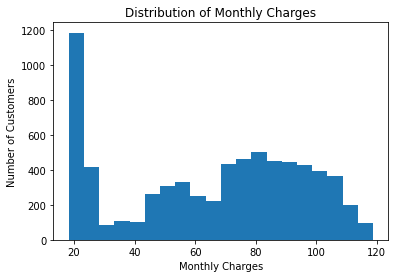

In [45]:


# Create a histogram of monthly charges
plt.hist(df['MonthlyCharges'], bins=20)

# Add labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Distribution of Monthly Charges')
plt.show()


In [46]:
data=df

<ipython-input-57-30688834dba3>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax8.set_xticklabels(data['PaymentMethod'].value_counts().index, rotation=90)
<ipython-input-57-30688834dba3>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax10.set_xticklabels(['No', 'Yes'])


(0.0, 1.0)

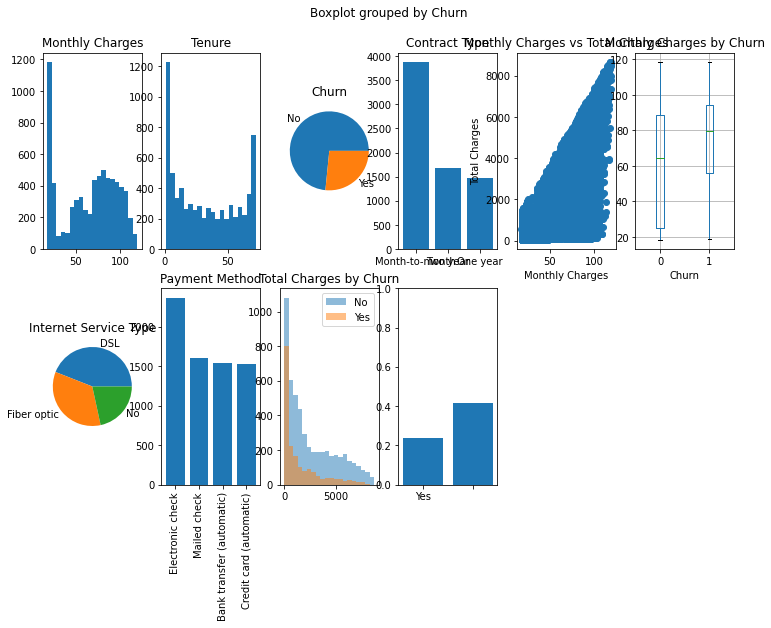

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
data =df

# Set up gridspec layout
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(nrows=2, ncols=6)

# First plot: histogram of MonthlyCharges
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(data['MonthlyCharges'], bins=20)
ax1.set_title('Monthly Charges')

# Second plot: histogram of tenure
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(data['tenure'], bins=20)
ax2.set_title('Tenure')

# Third plot: pie chart of Churn
ax3 = fig.add_subplot(gs[0, 2])
ax3.pie(data['Churn'].value_counts(), labels=['No', 'Yes'])
ax3.set_title('Churn')

# Fourth plot: bar chart of Contract type
ax4 = fig.add_subplot(gs[0, 3])
ax4.bar(data['Contract'].value_counts().index, data['Contract'].value_counts().values)
ax4.set_title('Contract Type')

# Fifth plot: scatter plot of MonthlyCharges vs TotalCharges
ax5 = fig.add_subplot(gs[0, 4])
ax5.scatter(data['MonthlyCharges'], data['TotalCharges'])
ax5.set_xlabel('Monthly Charges')
ax5.set_ylabel('Total Charges')
ax5.set_title('Monthly Charges vs Total Charges')

# Sixth plot: box plot of MonthlyCharges by Churn
ax6 = fig.add_subplot(gs[0, 5])
data.boxplot(column='MonthlyCharges', by='Churn', ax=ax6)
ax6.set_title('Monthly Charges by Churn')

# Seventh plot: pie chart of InternetService type
ax7 = fig.add_subplot(gs[1, 0])
ax7.pie(data['InternetService'].value_counts(), labels=data['InternetService'].unique())
ax7.set_title('Internet Service Type')

# Eighth plot: bar chart of PaymentMethod
ax8 = fig.add_subplot(gs[1, 1])
ax8.bar(data['PaymentMethod'].value_counts().index, data['PaymentMethod'].value_counts().values)
ax8.set_xticklabels(data['PaymentMethod'].value_counts().index, rotation=90)
ax8.set_title('Payment Method')

# Ninth plot: histogram of TotalCharges by Churn
ax9 = fig.add_subplot(gs[1, 2])
ax9.hist(data[data['Churn'] == 0]['TotalCharges'], bins=20, alpha=0.5, label='No')
ax9.hist(data[data['Churn'] == 1]['TotalCharges'], bins=20, alpha=0.5, label='Yes')
ax9.legend()
ax9.set_title('Total Charges by Churn')

# Tenth plot: bar chart of SeniorCitizen by Churn
ax10 = fig.add_subplot(gs[1, 3])
ax10.bar(data['SeniorCitizen'].value_counts().index, data.groupby('SeniorCitizen')['Churn'].mean())
ax10.set_xticklabels(['No', 'Yes'])
ax10.set_ylim([0, 1])



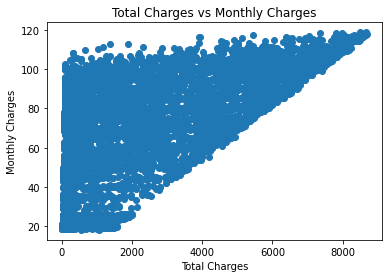

In [51]:
plt.scatter(data["TotalCharges"], data["MonthlyCharges"])
plt.xlabel("Total Charges")
plt.ylabel("Monthly Charges")
plt.title("Total Charges vs Monthly Charges")
plt.show()


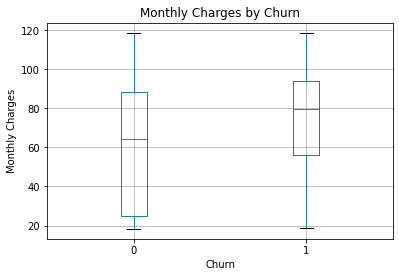

In [49]:
data.boxplot(column="MonthlyCharges", by="Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.title("Monthly Charges by Churn")
plt.suptitle("")
plt.show()


In [ ]:
counts = data["gender"].value_counts()
plt.bar(counts.index, counts.values,color=["black","green"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn by Gender")
plt.show()


In [ ]:
plt.boxplot([df[df['Churn'] == 0]['MonthlyCharges'], df[df['Churn'] == 1]['MonthlyCharges']])
plt.xticks([1, 2], ['No', 'Yes'])
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn Status')
plt.show()


In [ ]:
contract_churn_counts

In [ ]:
m_to_m=contract_churn_counts.index[0]
oneyear=contract_churn_counts.index[1]
twoyear=contract_churn_counts.index[2]

In [ ]:
contract_churn_counts.index

In [27]:
m_to_m_v1=contract_churn_counts.values[0][0]
m_to_m_v2=contract_churn_counts.values[0][1]

NameError: name 'contract_churn_counts' is not defined

In [28]:
plt.bar(x=m_to_m.index[0],height=s)
plt.bar(x=contract_churn_counts.index[0],height=contract_churn_counts.values[0][1],bottom=s)

NameError: name 'm_to_m' is not defined

<BarContainer object of 2 artists>

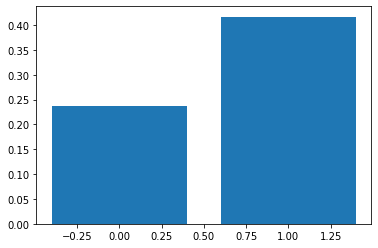

In [39]:
ax10.bar(data['SeniorCitizen'].value_counts().index, data.groupby('SeniorCitizen')['Churn'].mean())
ax10.set_xticklabels(['No', 'Yes'])
ax10.set_ylim([0, 1])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

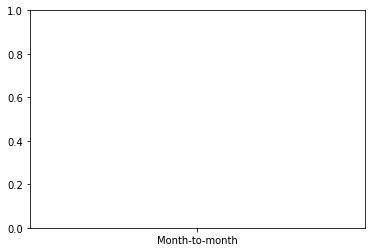

In [30]:
plt.bar(x=contract_churn_counts.index,height=contract_churn_counts.values.reshape(-1))

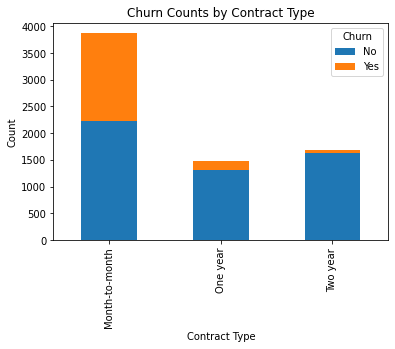

In [31]:
contract_churn_counts = df.groupby(['Contract', 'Churn'])['Churn'].count().unstack()
contract_churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Churn Counts by Contract Type')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


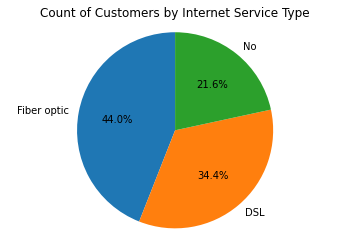

In [32]:
# Pie chart of the count of customers by Internet Service type
internet_counts = df['InternetService'].value_counts()
plt.pie(internet_counts.values, labels=internet_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Count of Customers by Internet Service Type')
plt.show()


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data into a DataFrame
#df = pd.read_csv('data.csv')

# Convert Total Charges column to numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Create a box plot
plt.boxplot('TotalCharges', by='PaymentMethod', figsize=(10, 6))

# Set the axis labels and title
plt.xlabel('Payment Method')
plt.ylabel('Total Charges')
plt.title('Distribution of Total Charges for each Payment Method')

# Show the plot
plt.show()


<ipython-input-33-06c541dffd54>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


TypeError: boxplot() got an unexpected keyword argument 'by'

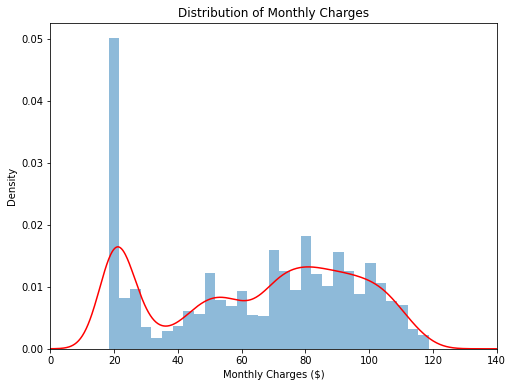

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# load the data
#data = pd.read_csv("data.csv")

# plot a histogram of MonthlyCharges with a KDE plot overlay
plt.figure(figsize=(8,6))
plt.hist(data["MonthlyCharges"], bins=30, density=True, alpha=0.5)
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Density")
plt.title("Distribution of Monthly Charges")
data["MonthlyCharges"].plot(kind="kde", xlim=(0,140), color="red")
plt.show()


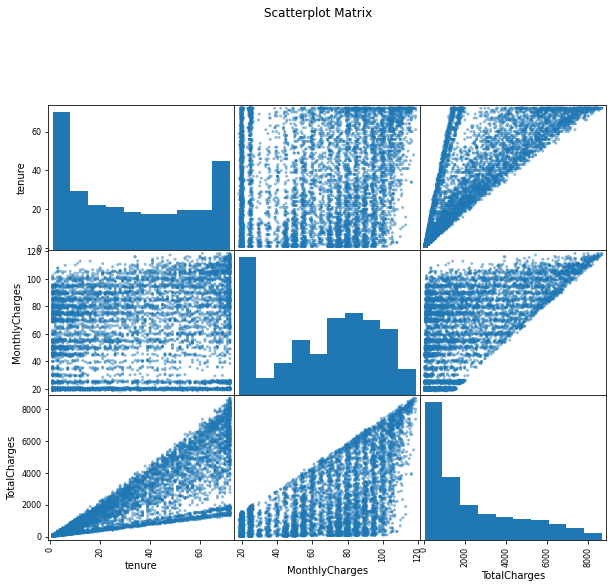

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# load the data
#data = pd.read_csv("data.csv")

# plot a scatterplot matrix
pd.plotting.scatter_matrix(data[["tenure", "MonthlyCharges", "TotalCharges"]], figsize=(10,8))
plt.suptitle("Scatterplot Matrix", y=1.05)
plt.show()


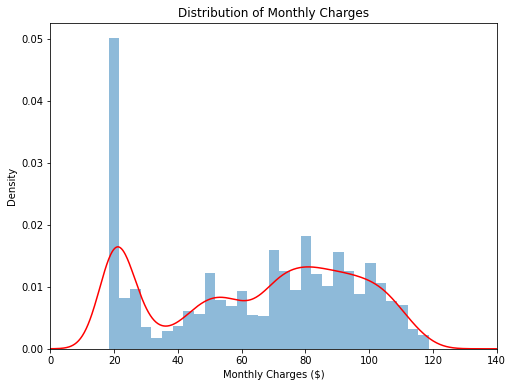

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# load the data
#data = pd.read_csv("data.csv")

# plot a histogram of MonthlyCharges with a KDE plot overlay
plt.figure(figsize=(8,6))
plt.hist(data["MonthlyCharges"], bins=30, density=True, alpha=0.5)
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Density")
plt.title("Distribution of Monthly Charges")
data["MonthlyCharges"].plot(kind="kde", xlim=(0,140), color="red")
plt.show()


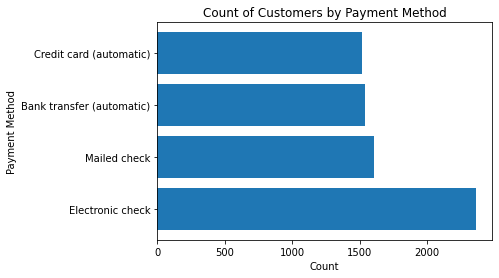

In [93]:
# Horizontal bar plot of the count of customers by Payment Method
payment_counts = df['PaymentMethod'].value_counts()
plt.barh(payment_counts.index, payment_counts.values)
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.title('Count of Customers by Payment Method')
plt.show()


In [ ]:
churn_df=pd.get_dummies(churn_df,columns=["InternetService","Contract","PaymentMethod"])

In [ ]:
churn_df

In [ ]:
sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

In [ ]:
churn_df["Partner"].replace({"Yes":1,"No":0},inplace=True)
churn_df["Dependents"].replace({"Yes":1,"No":0},inplace=True)
churn_df["TechSupport"].replace({"Yes":1,"No":0},inplace=True)
churn_df["PhoneService"].replace({"Yes":1,"No":0},inplace=True)
churn_df["MultipleLines"].replace({"Yes":1,"No":0},inplace=True)
churn_df["OnlineSecurity"].replace({"Yes":1,"No":0},inplace=True)
churn_df["OnlineBackup"].replace({"Yes":1,"No":0},inplace=True)
churn_df["DeviceProtection"].replace({"Yes":1,"No":0},inplace=True)
churn_df["TechSupport"].replace({"Yes":1,"No":0},inplace=True)
churn_df["StreamingTV"].replace({"Yes":1,"No":0},inplace=True)
churn_df["StreamingMovies"].replace({"Yes":1,"No":0},inplace=True)
churn_df["PaperlessBilling"].replace({"Yes":1,"No":0},inplace=True)
churn_df["Churn"].replace({"Yes":1,"No":0},inplace=True)

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
churn_df[cols_to_scale] = scaler.fit_transform(churn_df[cols_to_scale])

In [ ]:
for col in churn_df:
    print(f'{col}: {churn_df[col].unique()}')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=churn_df.drop("Churn",axis=1)
y=churn_df["Churn"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

In [ ]:
len(X_train.columns)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(26,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
                       ])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=100)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
yp = model.predict(X_test)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

In [ ]:
y_test[:10]

In [ ]:
import numpy as np

In [ ]:
x=np.array([330,120,9,4])

In [ ]:
x.shape